# Homework 16: Unsupervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import utils as utils
from fractions import Fraction

from IPython.display import display, HTML

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

utils.load_custom_styles()

---
## Exercise 2.1










<img src="figures/homework-16/exercise-2.1.png" width="600" />






We want to show that:

<img src="figures/homework-16/equation-2.17.png" width="600" />



is equivalent to:

<img src="figures/homework-16/equation-2.16.png" width="600" />






<img src="figures/homework-16/rewrite-eq.2.17.png" width="600" />






In Equation 2.17, we used the constraint $W^T W = I$. Thus, in order to minimize the first optimization problem, we need to maximize the second.

---
## Exercise 2.2


<img src="figures/homework-16/exercise-2.2.png" width="600" />















In [2]:
X = [[-1,   0, -0.5, -1.5, -2,  0,   -1, 1, 1.3, 0.7, 2.5, 0],
     [ 0 , -1, -0.5, -1.5,  0, -2, -1.3, 1, 0.7, 1.3,   1, 1]]
X = np.array(X)
X.shape

In [3]:
M = np.array([[-1, -0.9],
              [-1,    0]])

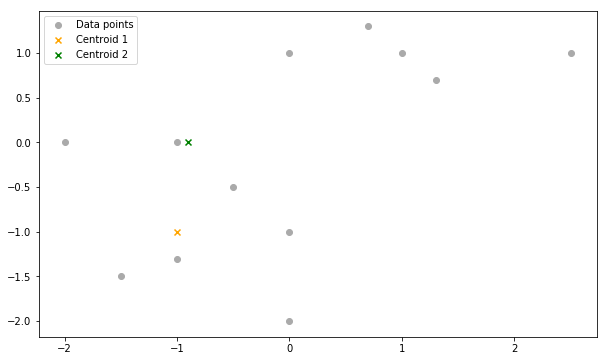

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X[0], X[1], color='#aaaaaa', label='Data points')
centroid1 = M[:,0] 
centroid2 = M[:,1] 
ax.scatter(centroid1[0], centroid1[1], marker='x', color='orange', label='Centroid 1')
ax.scatter(centroid2[0], centroid2[1], marker='x', color='green', label='Centroid 2')
ax.legend();

In [5]:
from sklearn.metrics import pairwise_distances

def batchKMeans(X, M, max_iterations=10):
    centroids = M.copy()
    assert(X.shape[0] == centroids.shape[0])
    K = centroids.shape[1]
    print('K=%s' % K)
    clusters = []
    for k in range(K):
        clusters.append({'centroid': centroids.T[k], 'members': []})
    results = {
        'iterations': [],
        'final_clustering': None
    }
    print('Initial Centroids')
    print(centroids)
    for i in range(max_iterations):
        # Compute pairwise distances
        distances = pairwise_distances(X.T, centroids.T)
        
        # Determine which cluster each data point belongs to 
        cluster_indices = distances.argmin(axis=1)
        
        # Reset data point from previous iteration
        for k in range(K):
            clusters[k]['members'] = []
            
        # Assign each data point to a cluster based on the closest centroid
        for data_idx, cluster_idx in enumerate(cluster_indices):
            clusters[cluster_idx]['members'].append(X[:,data_idx])
        print('\n\nIteration %s' % (i+1))
        
            
        print('\nLabels')
        print(cluster_indices)
        
        print('\nDistances')
        print(distances.T)
        
        # Recompute the centroids
        for k in range(K):
            new_centroid = np.mean(clusters[k]['members'], axis=0)
            centroids[:, k] = new_centroid
            clusters[k]['centroid'] = new_centroid
            
        print('\nNew centroids')
        print(centroids)
        
        results['iterations'].append({
            'distances': distances.T,
            'cluster_indices': cluster_indices,
            'clustering': clusters
        })
    results['final_clustering'] = clusters
    return results

In [6]:
result = batchKMeans(X, M, 3)

K=2
Initial Centroids
[[-1.  -0.9]
 [-1.   0. ]]


Iteration 1

Labels
[1 0 1 0 1 0 0 1 1 1 1 1]

Distances
[[1.         1.         0.70710678 0.70710678 1.41421356 1.41421356
  0.3        2.82842712 2.86006993 2.86006993 4.03112887 2.23606798]
 [0.1        1.3453624  0.64031242 1.61554944 1.1        2.19317122
  1.30384048 2.14709106 2.30867928 2.06155281 3.54400903 1.3453624 ]]

New centroids
[[-0.625   0.25  ]
 [-1.45    0.5625]]


Iteration 2

Labels
[1 0 0 0 0 0 0 1 1 1 1 1]

Distances
[[1.49770658 0.77014609 0.95818839 0.87642741 1.99828051 0.83254129
  0.40388736 2.93991922 2.8858491  3.0525604  3.97090985 2.52846297]
 [1.37073201 1.58237361 1.30054075 2.70488563 2.31924691 2.57466624
  2.24307964 0.86827775 1.05896471 0.86394806 2.2921401  0.50389111]]

New centroids
[[-0.83333333  0.75      ]
 [-1.05        0.83333333]]


Iteration 3

Labels
[0 0 0 0 0 0 0 1 1 1 1 1]

Distances
[[1.06314523 0.83483199 0.64312605 0.80432857 1.56958947 1.26370267
  0.30046261 2.75020201 2.759277

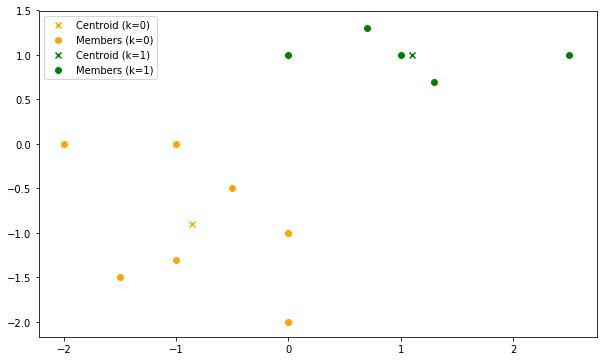

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['orange', 'green']
clusters = result['final_clustering']

K = len(clusters)
for k in range(K):
    centroid = clusters[k]['centroid']
    data_points = np.array(clusters[k]['members']).T
    
    ax.scatter(centroid[0], centroid[1], marker='x', color=colors[k], label='Centroid (k=%s)' % k)
    ax.scatter(data_points[0], data_points[1], color=colors[k], label='Members (k=%s)' % k)
    
ax.legend();


---
## Exercise 2.3


<img src="figures/homework-16/exercise-2.3.png" width="600" />




In [8]:
def fuzzyKMeans(X, M, gamma, max_iterations=10):
    centroids = M.copy()
    assert(X.shape[0] == centroids.shape[0])
    N = X.shape[1]
    K = centroids.shape[1]
    
    print('Initial Centroids')
    print(centroids)
    for iteration in range(max_iterations):
        # Compute membership vectors
        a_ik = np.zeros((N, K))
        for i in range(N):
            for k in range(K):
                x_i = X.T[i]
                mu_k = centroids.T[k]
                distance = np.linalg.norm(x_i - mu_k)
                a_ik[i, k] = np.power(distance, -gamma)

        # Normalise membership vectors
        a_ik = (a_ik.T / a_ik.sum(axis=1)).T
        
        print('\nMembership vectors')
        print(a_ik)
        
        for k in range(K):
            new_centroid = np.sum(a_ik[:,k] * X, axis=1)
            centroids[:, k] = new_centroid
        
        print('\nNew centroids')
        print(centroids)

In [9]:
fuzzyKMeans(X, M, gamma=2, max_iterations=3)

Initial Centroids
[[-1.  -0.9]
 [-1.   0. ]]

Membership vectors
[[0.00990099 0.99009901]
 [0.64412811 0.35587189]
 [0.45054945 0.54945055]
 [0.8392283  0.1607717 ]
 [0.37694704 0.62305296]
 [0.70631424 0.29368576]
 [0.94972067 0.05027933]
 [0.36558287 0.63441713]
 [0.39452258 0.60547742]
 [0.34191472 0.65808528]
 [0.43595974 0.56404026]
 [0.26578561 0.73421439]]

New centroids
[[-0.98993104  0.48993104]
 [-2.98752748  1.68752748]]

Membership vectors
[[0.36215392 0.63784608]
 [0.60217841 0.39782159]
 [0.47282941 0.52717059]
 [0.85096736 0.14903264]
 [0.47635837 0.52364163]
 [0.87620047 0.12379953]
 [0.79648131 0.20351869]
 [0.03558792 0.96441208]
 [0.07968627 0.92031373]
 [0.00906574 0.99093426]
 [0.13846722 0.86153278]
 [0.04051178 0.95948822]]

New centroids
[[-3.13252356  2.63252356]
 [-4.62073803  3.32073803]]

Membership vectors
[[0.48327712 0.51672288]
 [0.52758071 0.47241929]
 [0.50517453 0.49482547]
 [0.76472291 0.23527709]
 [0.58938221 0.41061779]
 [0.6787265  0.3212735 ]
 [0

---
## Exercise 2.4


<img src="figures/homework-16/exercise-2.4.png" width="600" />





In [10]:
X = np.array([[-1,   0, -0.5, -1.5, -2,  0,   -1, 1, 1.3, 0.7, 2.5, 0],
              [ 0 , -1, -0.5, -1.5,  0, -2, -1.3, 1, 0.7, 1.3,   1, 1]])
X.shape

---
### Exercise 2.4a

<img src="figures/homework-16/exercise-2.4-a.png" width="600" />



To center the data, we use the formula:
$$
 \hat{\mathbf{x}}_i = \mathbf{x}_i - \mathbf{\mu}
$$
where $i = 1,2,\cdots, N$ and $\mu$ is the mean vector of the dataset.

In [11]:
mean = np.mean(X, axis=1).reshape(-1, 1)
mean

array([[-0.04166667],
       [-0.10833333]])

In [12]:
centered_X = X - mean
centered_X

array([[-0.95833333,  0.04166667, -0.45833333, -1.45833333, -1.95833333,
         0.04166667, -0.95833333,  1.04166667,  1.34166667,  0.74166667,
         2.54166667,  0.04166667],
       [ 0.10833333, -0.89166667, -0.39166667, -1.39166667,  0.10833333,
        -1.89166667, -1.19166667,  1.10833333,  0.80833333,  1.40833333,
         1.10833333,  1.10833333]])

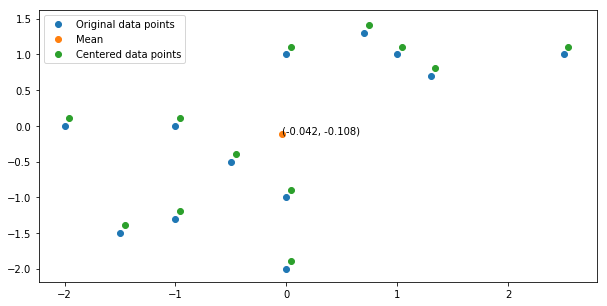

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
x1 = X[0]
x2 = X[1]
ax.scatter(x1, x2, label='Original data points')

ax.scatter(mean[0], mean[1], label='Mean')
ax.annotate('(%0.3f, %0.3f)' % tuple(mean), tuple(mean))

centered_x1 = centered_X[0]
centered_x2 = centered_X[1]
ax.scatter(centered_x1, centered_x2, label='Centered data points')
ax.legend()

---
### Exercise 2.4b

<img src="figures/homework-16/exercise-2.4-b.png" width="600" />




<img src="figures/lecture-16/data-standardisation.png" width="600" />












<div class="warning">
Standard deviation formula above seems wrong. Standard deviation formula should be:

$$
s_d = \sqrt{ \frac{\sum_{i=1}^{N} (x_{id} - \mu_d)^2}{N-1}   }
$$
</div>

In [14]:
X

array([[-1. ,  0. , -0.5, -1.5, -2. ,  0. , -1. ,  1. ,  1.3,  0.7,  2.5,
         0. ],
       [ 0. , -1. , -0.5, -1.5,  0. , -2. , -1.3,  1. ,  0.7,  1.3,  1. ,
         1. ]])

In [15]:
N = X.shape[1]
N

In [16]:
mean = np.mean(X, axis=1).reshape(-1, 1)
mean

array([[-0.04166667],
       [-0.10833333]])

In [17]:
# Compute standard deviation according to Equation 2.3
1/(N-1) * np.sqrt(np.sum((X - mean)**2, axis=1))

array([0.38472021, 0.34292334])

Standard deviation should be [1.276, 1.1373] according to the solution manual.

In [18]:
# Compute the standard deviation as defined in NumPy
np.sqrt(np.sum((X - mean)**2, axis=1) / (N-1))

array([1.27597259, 1.13734806])

In [19]:
# In standard statistical practice, ddof=1 provides an unbiased estimator
# of the variance of the infinite population whereas ddof=0 provides a 
# maximum likelihood estimate of the variance for normally distributed variables. 
std = np.std(X, axis=1, ddof=1)
std

array([1.27597259, 1.13734806])

In [20]:
def standardise(X):
    N = X.shape[1]
    mean = np.mean(X, axis=1).reshape(-1, 1)
    std = np.sqrt(np.sum((X - mean)**2, axis=1) / (N-1))
    return (X - mean) / std.reshape(-1, 1)

In [21]:
standardise(X)

array([[-0.75106106,  0.03265483, -0.35920312, -1.14291901, -1.53477696,
         0.03265483, -0.75106106,  0.81637072,  1.05148549,  0.58125595,
         1.99194456,  0.03265483],
       [ 0.09525082, -0.78398751, -0.34436834, -1.22360667,  0.09525082,
        -1.66322583, -1.047759  ,  0.97448914,  0.71071764,  1.23826064,
         0.97448914,  0.97448914]])

---
### Exercise 2.4c

<img src="figures/homework-16/exercise-2.4-c.png" width="600" />



In [22]:
X / np.linalg.norm(X, axis=0)

array([[-1.        ,  0.        , -0.70710678, -0.70710678, -1.        ,
         0.        , -0.60971076,  0.70710678,  0.8804711 ,  0.47409982,
         0.92847669,  0.        ],
       [ 0.        , -1.        , -0.70710678, -0.70710678,  0.        ,
        -1.        , -0.79262399,  0.70710678,  0.47409982,  0.8804711 ,
         0.37139068,  1.        ]])

---
## Exercise 2.5


<img src="figures/homework-16/exercise-2.5.png" width="600" />















We can find the projection matrix $W$ using optimising the following expression:

<img src="figures/lecture-16/pca-objective-function.png" width="600" />




where
- $W^{*}$ is the optimal solution for $W$
- $I \in \mathbb{R}^{D \times D}$ is the identity matrix
- $Tr(A)$ is the trace operator. It sums the diagonal elements of the matrix $A$
- $\tilde{S}_T = \bar{X}\bar{X}^T$ is the scatter matrix defined on the **centered** dataset $\bar{X}$.

The solution of 2.16 is obtained by applying eigen-analysis to the scatter matrix $\tilde{S}_T$. The optimal projection matrix $W^{*}$ is formed by the eigen-vectors of $\tilde{S}_T$ sorted in descending order of the corresponding eigen-values i.e., the column of $W^{*}$ are the eigen-vectors of $\tilde{S}_T$.

In [23]:
# Define the dataset
X = np.array([[1, 2, 2, 3, 3, 4],
              [1, 2, 3, 2, 3, 4]])

In [24]:
mean = np.mean(X, axis=1).reshape(-1, 1)
mean

array([[2.5],
       [2.5]])

In [25]:
X_centered = X - mean
X_centered

array([[-1.5, -0.5, -0.5,  0.5,  0.5,  1.5],
       [-1.5, -0.5,  0.5, -0.5,  0.5,  1.5]])

In [26]:
scatter_matrix = np.dot(X_centered, X_centered.T)
scatter_matrix

array([[5.5, 4.5],
       [4.5, 5.5]])

In [27]:
eigenvals, eigenvect = np.linalg.eig(scatter_matrix)

In [28]:
eigenvals

array([10.,  1.])

In [29]:
eigenvect

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [30]:
# Our projection matrix, W consists of the eigenvector
# corresponding to the maximal eigenvalue
W = eigenvect[:,0].reshape(-1, 1)
W

array([[0.70710678],
       [0.70710678]])

In [31]:
# Compute the projected data
np.dot(W.T, X)

array([[1.41421356, 2.82842712, 3.53553391, 3.53553391, 4.24264069,
        5.65685425]])